# Bicycle Ride Share

In [1]:
#import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      
import seaborn as sns

In [2]:
#load monthly data
df_may= pd.read_csv("C:/Users/dct_1/PycharmProjects/pythonProject/202205-divvy-tripdata.csv")
df_june= pd.read_csv("C:/Users/dct_1/PycharmProjects/pythonProject/202206-divvy-tripdata.csv")
df_july= pd.read_csv("C:/Users/dct_1/PycharmProjects/pythonProject/202207-divvy-tripdata.csv")
df_aug= pd.read_csv("C:/Users/dct_1/PycharmProjects/pythonProject/202208-divvy-tripdata.csv")
df_sep= pd.read_csv("C:/Users/dct_1/PycharmProjects/pythonProject/202209-divvy-tripdata.csv")
df_oct= pd.read_csv("C:/Users/dct_1/PycharmProjects/pythonProject/202210-divvy-tripdata.csv")

Clean the data

In [3]:
#combine all datasets(all with same columns) 
df = pd.concat([df_may, df_june,df_july, df_aug, df_sep, df_oct])

In [4]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
df.shape

(4273506, 13)

In [6]:
#convert started_at and ended_at to datetime
# errors=coerce to NaT(not a time, for dates that cant be converted)
df['started_at']=pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at']=pd.to_datetime(df['ended_at'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4273506 entries, 0 to 558684
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 456.5+ MB


In [8]:
print(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [9]:
#drop 'start_lat','start_lng','end_lat','end_lng'columns
df.drop(axis=1, columns=['start_lat','start_lng','end_lat','end_lng'],inplace=True)
print(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual'],
      dtype='object')


In [10]:
#calculate ride length as duration hh:mm thx google
df['duration'] = df['ended_at'] - df['started_at']
df['duration'] = df['duration'].apply(lambda x: x / np.timedelta64(1, 'h'))
df['duration'] = df['duration'].apply(lambda x: "{:.0f}:{:.0f}".format(*divmod(x * 60, 60)))

In [11]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
member_casual                 object
duration                      object
dtype: object

In [12]:
#check for duplicates
df.duplicated().sum()

0

In [13]:
#check for null
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    598851
start_station_id      598851
end_station_name      642598
end_station_id        642598
member_casual              0
duration                   0
dtype: int64

In [14]:
#replace station "na" with 'unknown'
df.fillna('unknown', inplace=True)

In [15]:
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
duration              0
dtype: int64

In [16]:
#added day of week column to determine weekend use
df['day_of_week'] = df['started_at'].dt.weekday.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',
                                                     4:'Friday',5:'Saturday',6:'Sunday'})

In [17]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,duration,day_of_week
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,member,0:33,Monday
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,member,0:38,Wednesday
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,member,0:22,Thursday
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,member,0:9,Tuesday
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,member,0:5,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
558680,BC3BFA659C9AB6F1,classic_bike,2022-10-30 01:41:29,2022-10-30 01:57:16,Clifton Ave & Armitage Ave,TA1307000163,Lincoln Ave & Roscoe St*,chargingstx5,casual,0:16,Sunday
558681,ACD65450291CF95F,classic_bike,2022-10-30 01:41:54,2022-10-30 01:57:09,Clifton Ave & Armitage Ave,TA1307000163,Lincoln Ave & Roscoe St*,chargingstx5,casual,0:15,Sunday
558682,4AAC03D1438E97CA,classic_bike,2022-10-15 09:34:11,2022-10-15 10:03:21,Sedgwick St & North Ave,TA1307000038,Wabash Ave & Grand Ave,TA1307000117,casual,0:29,Saturday
558683,8E6F3F29785E5D40,classic_bike,2022-10-09 10:21:34,2022-10-09 10:43:45,Sedgwick St & North Ave,TA1307000038,Damen Ave & Clybourn Ave,13271,member,0:22,Sunday


Analyze

# How do annual members and casual riders use Cyclistic bikes differently?

In [18]:
#Count riders and show mean
ct = df['member_casual'].count()
member_ct = df['member_casual'].value_counts()
mem_pct = ((member_ct/ct)*100).round(decimals=1)
print(ct)
print(mem_pct)

4273506
member    55.1
casual    44.9
Name: member_casual, dtype: float64


In [19]:
mem_duration = df.groupby('member_casual')['duration'].max()
mem_duration



member_casual
casual    9:9
member    9:8
Name: duration, dtype: object

In [20]:
#duration in HH:MM(str)  convert as variable duration1(float)thx google
df['duration_flt'] = pd.to_numeric(df['duration'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60))

In [21]:
#mean and median duration 
df.pivot_table(values='duration_flt', index='member_casual', aggfunc=[np.mean,np.median])


,mean,median
,duration_flt,duration_flt
member_casual,,
casual,0.492372,0.216667
member,0.220954,0.150000


In [22]:
bike_ct= df['rideable_type'].value_counts()
bike_ct

electric_bike    2159008
classic_bike     1967631
docked_bike       146867
Name: rideable_type, dtype: int64

In [23]:
#df.pivot_table(values=['rideable_type'].value_counts(), index='member_casual', columns='rideable_type')
df.groupby(['member_casual','rideable_type'])['rideable_type'].value_counts()

member_casual  rideable_type  rideable_type
casual         classic_bike   classic_bike      747744
               docked_bike    docked_bike       146867
               electric_bike  electric_bike    1025520
member         classic_bike   classic_bike     1219887
               electric_bike  electric_bike    1133488
Name: rideable_type, dtype: int64

In [24]:
# member and casual riders each day grouped in order by day of week
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = df[df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])]
mem_wd_ct= df_weekday[df_weekday['member_casual'] == 'member'].groupby('day_of_week')['member_casual'].count().reindex(cats[:7])
cas_wd_ct=df_weekday[df_weekday['member_casual'] == 'casual'].groupby('day_of_week')['member_casual'].count().reindex(cats[:7])

print(mem_wd_ct)


day_of_week
Monday       327016
Tuesday      345552
Wednesday    360521
Thursday     369659
Friday       337333
Saturday     327600
Sunday       285694
Name: member_casual, dtype: int64


In [25]:
print(cas_wd_ct)

day_of_week
Monday       229093
Tuesday      212136
Wednesday    220888
Thursday     249947
Friday       283844
Saturday     395711
Sunday       328512
Name: member_casual, dtype: int64


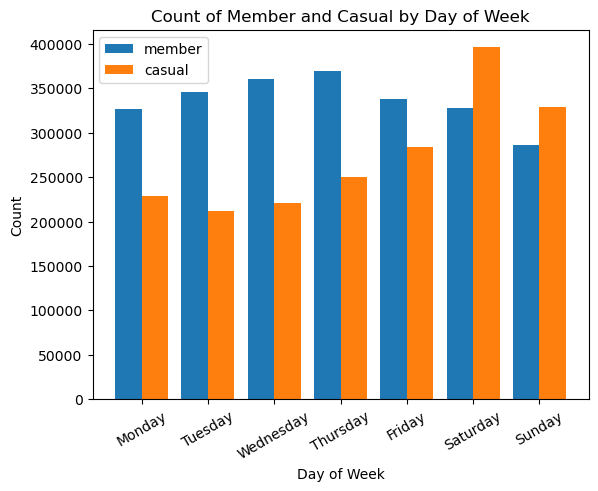

In [26]:
# plot to show how weekend is opposite
barWidth = 0.4
r1 = np.arange(len(mem_wd_ct))
r2 = [x + barWidth for x in r1]

plt.bar(r1, mem_wd_ct, width = barWidth, label = 'member')
plt.bar(r2, cas_wd_ct, width = barWidth, label = 'casual')

# labels and title
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Count of Member and Casual by Day of Week')

# xticks to fit and rotate x labels
plt.xticks([r + barWidth/2 for r in range(len(mem_wd_ct))], mem_wd_ct.index)
plt.xticks(rotation=30)

plt.legend()

plt.show()